# <div align="center">Implement the image rotation with nearest neighbor interpolation.</div>
---------------------------------------------------------------------

you can Find me on Github:
> ###### [ GitHub](https://github.com/lev1khachatryan)

In [83]:
import numpy as np

from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import copy

img=mpimg.imread('inputs/1.png')

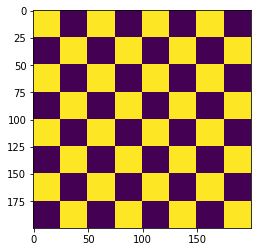

In [75]:
plt.imshow(img)

In [88]:
def nn_interpolate(A, new_size):
    """
    Nearest Neighbor Interpolation, Step by Step
    
    Parameters:
        A (matrix) - initial image to interpolate
        new_size (list or scalar) - new image shape
    
    Returns:
        matrix (interpolated image)
    """
    # get sizes
    old_size = A.shape
    
    # calculate row and column ratios
    row_ratio, col_ratio = new_size[0]/old_size[0], new_size[1]/old_size[1]
    
    # define new pixel row position i
    new_row_positions = np.array(range(new_size[0]))+1
    new_col_positions = np.array(range(new_size[1]))+1
    
    # normalize new row and col positions by ratios
    new_row_positions = new_row_positions / row_ratio
    new_col_positions = new_col_positions / col_ratio
    
    # apply ceil to normalized new row and col positions
    new_row_positions = np.ceil(new_row_positions)
    new_col_positions = np.ceil(new_col_positions)
    
    # find how many times to repeat each element
    row_repeats = np.array(list(Counter(new_row_positions).values()))
    col_repeats = np.array(list(Counter(new_col_positions).values()))
    
    # perform column-wise interpolation on the columns of the matrix
    row_matrix = np.dstack([np.repeat(A[:, i], row_repeats) 
                            for i in range(old_size[1])])[0]
    
    # perform column-wise interpolation on the columns of the matrix
    nrow, ncol = row_matrix.shape
    final_matrix = np.stack([np.repeat(row_matrix[i, :], col_repeats)
                             for i in range(nrow)])

    return final_matrix
    
    
def nn_interpolate_vectorized(A, new_size):
    """Vectorized Nearest Neighbor Interpolation"""

    old_size = A.shape
    row_ratio, col_ratio = np.array(new_size)/np.array(old_size)

    # row wise interpolation 
    row_idx = (np.ceil(range(1, 1 + int(old_size[0]*row_ratio))/row_ratio) - 1).astype(int)

    # column wise interpolation
    col_idx = (np.ceil(range(1, 1 + int(old_size[1]*col_ratio))/col_ratio) - 1).astype(int)

    final_matrix = A[:, row_idx][col_idx, :]

    return final_matrix

In [89]:
new_img = nn_interpolate(img, [280, 400])

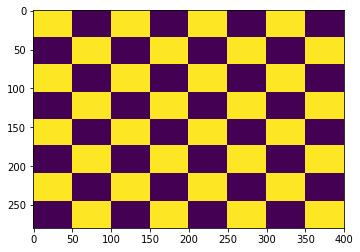

In [90]:
plt.imshow(new_img)

In [91]:
new_img = nn_interpolate_vectorized(img, [400, 280])

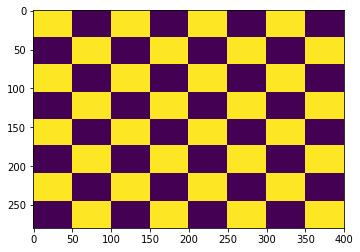

In [92]:
plt.imshow(new_img)